In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud, STOPWORDS


Saving links.csv to links.csv
Saving movies.csv to movies.csv
Saving ratings.csv to ratings.csv
Saving tags.csv to tags.csv


**reading the dataset**

In [4]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
links = pd.read_csv('links.csv')
tags = pd.read_csv('tags.csv')

**Dropping Time stamp columns**

In [8]:
ratings = ratings.drop('timestamp', axis = 1)

In [9]:
movie_ratings = pd.merge(movies, ratings)
movie_ratings.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5


***Describing the dataset***

In [10]:
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [11]:
ratings.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


Text(0.5, 0.98, 'Frequency Distribution of Rating Scores')

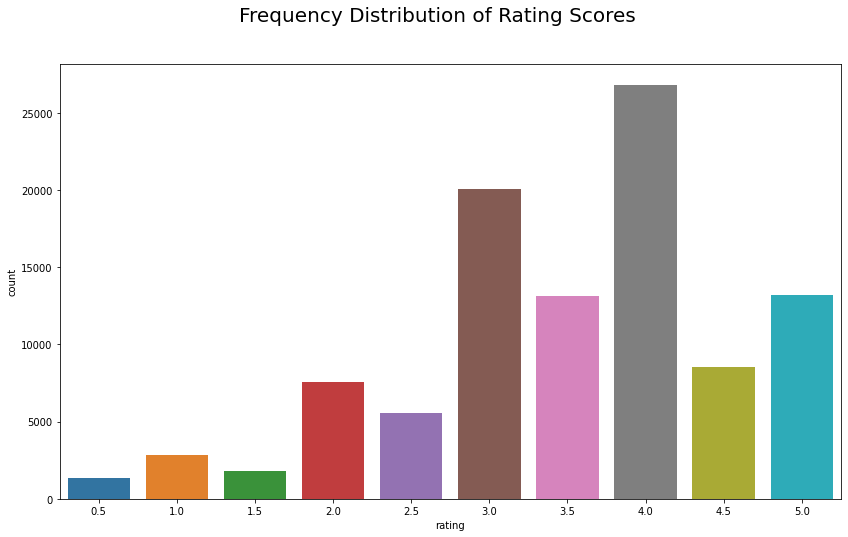

In [12]:
fig, ax = plt.subplots(figsize = (14,8))
sns.countplot(x = ratings.rating)
plt.suptitle('Frequency Distribution of Rating Scores', fontsize = 20)

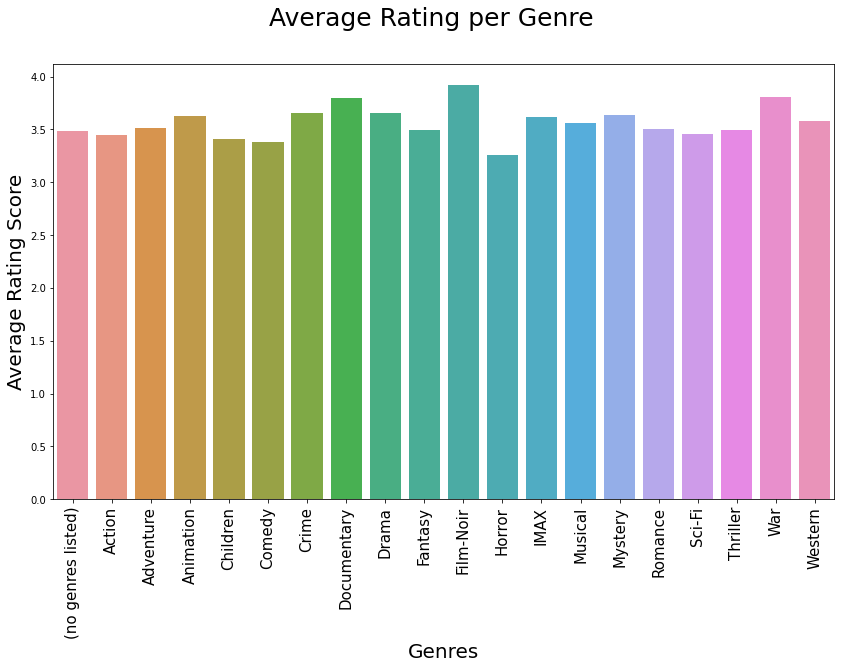

In [27]:
genre_ratingdf = movie_ratings.loc[:,['genres', 'rating']]
genre_ratingdf = genre_ratingdf.set_index(genre_ratingdf.columns.drop('genres',1).tolist()).genres.str.split('|', expand=True).stack().reset_index().rename(columns={0:'genres'}).loc[:, genre_ratingdf.columns]
genre_mean_rating = pd.DataFrame(genre_ratingdf.groupby('genres')['rating'].mean()).reset_index()
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x = 'genres', y = 'rating', data = genre_mean_rating)
ax.tick_params(axis='x', labelsize= 15, rotation=90)
ax.set_xlabel('Genres', fontsize= 20)
ax.set_ylabel('Average Rating Score',fontsize= 20)
plt.suptitle('Average Rating per Genre', fontsize= 25)
plt.show()

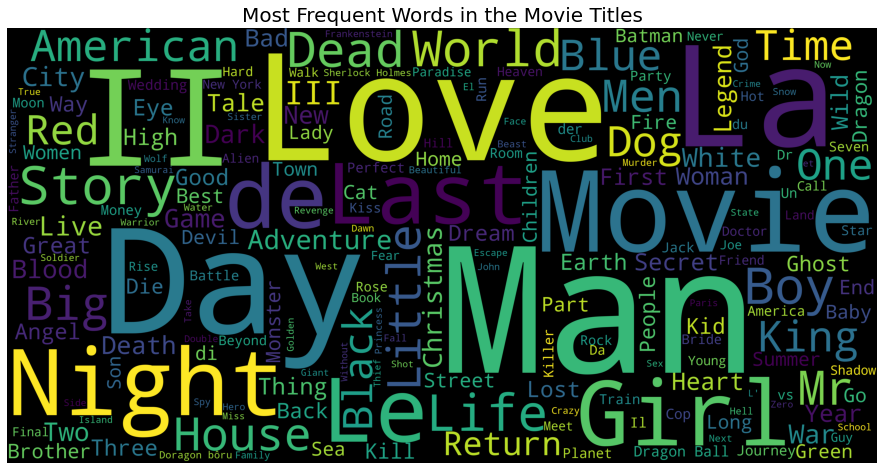

In [14]:
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Titles', fontsize = 20)
plt.show()

**Converting Dictionary into list for counting the frequency of genres**

In [28]:
genre_labels = set()
for genre in movies['genres'].str.split('|').values:
    genre_labels.update(genre)
def keyword_count(dataset, column, keywords):
    keyword_dict = {key:0 for key in keywords}
    for genre in dataset[column].str.split('|'):                
        for key in [key for key in genre if key in keywords]: 
            if pd.notna(key): 
                keyword_dict[key] += 1
    keyword_occurences = []
    for k,v in keyword_dict.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_dict
keyword_occurences, keyword_dict = keyword_count(movies, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 4361],
 ['Comedy', 3756],
 ['Thriller', 1894],
 ['Action', 1828],
 ['Romance', 1596]]

In [16]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


**Create the wordcloud of genres keywords**

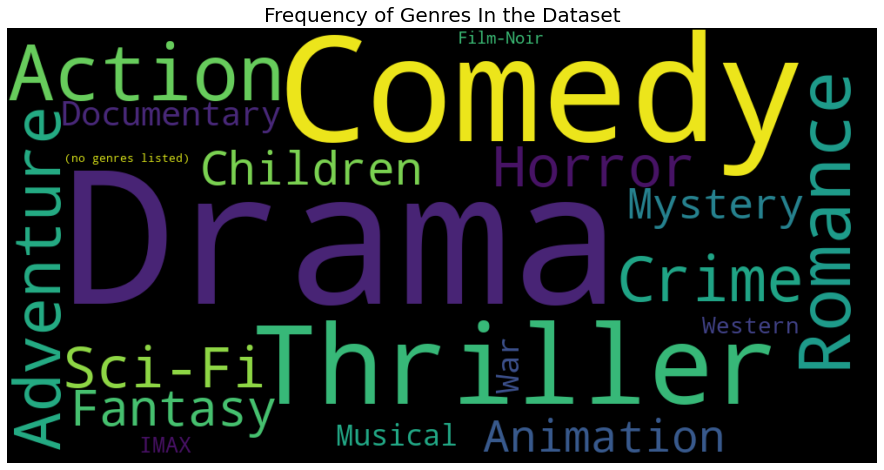

In [17]:
genre_wordcloud = WordCloud(width=1000,height=500, background_color='black')
genre_wordcloud.generate_from_frequencies(keyword_dict)
fig, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Frequency of Genres In the Dataset', fontsize = 20)
plt.show()

In [18]:
mt_ratings = pd.merge(movie_ratings, tags).drop('timestamp', axis = 1)
mt_ratings.head()

,movieId,title,genres,userId,rating,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,4.0,pixar
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,4.0,pixar
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,3.5,fun
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,4.0,fantasy
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,4.0,magic board game


In [19]:
mt_ratings['genres'] = mt_ratings['genres'].apply(lambda x: ''.join(x.replace('|', ' ').lower()))
mt_ratings.head()

,movieId,title,genres,userId,rating,tag
0,1,Toy Story (1995),adventure animation children comedy fantasy,336,4.0,pixar
1,1,Toy Story (1995),adventure animation children comedy fantasy,474,4.0,pixar
2,1,Toy Story (1995),adventure animation children comedy fantasy,567,3.5,fun
3,2,Jumanji (1995),adventure children fantasy,62,4.0,fantasy
4,2,Jumanji (1995),adventure children fantasy,62,4.0,magic board game


In [20]:
def combined_features(row):
    return row['genres']+" "+row['tag']
mt_ratings["combined_features"] = mt_ratings.apply(combined_features, axis =1)
mt_ratings.sample(2)

,movieId,title,genres,userId,rating,tag,combined_features
544,750,Dr. Strangelove or: How I Learned to Stop Worr...,comedy war,513,5.0,Slim Pickens,comedy war Slim Pickens
241,296,Pulp Fiction (1994),comedy crime drama thriller,599,5.0,cool,comedy crime drama thriller cool


In [21]:
mt_ratings.reset_index(inplace = True)

**Defining filter using  cosine_similarity**

In [22]:
class ContentBasedRec:

    #     initialize the class object variables
    def __init__(self,name,df):
        self.name = name
        self.df = df
        self.title = df['title']
        self.index = df['index']
        self.combined_features = df['combined_features']
        
        
    def cosine_sim(self):
        from sklearn.feature_extraction.text import CountVectorizer
        from sklearn.metrics.pairwise import cosine_similarity
        import pandas as pd
        count_vec = CountVectorizer()
        count_matrix = count_vec.fit_transform(self.combined_features)
        cosine_sim = pd.DataFrame(cosine_similarity(count_matrix))
        return cosine_sim

    def title_index(self):
        return self.df[self.title == self.name]["index"].values[0]

    def similar_movies(self):
        self.title_index()
        similar_movies = list(enumerate(self.cosine_sim()[self.title_index()]))
        return sorted(similar_movies, key=lambda x:x[1], reverse=True)

    def movie_list(self):
        movie_list = []
        for movie in self.similar_movies():
            movie_index = movie[0]
            movie_title = self.df[self.index == movie_index]["title"].values[0]
            if movie_title not in movie_list:
                movie_list.append(movie_title)
            else:
                 pass
            if len(movie_list)==15:
                print('Here are a few recommendations for you')
                return movie_list

In [23]:
mt_ratings.sample(1, random_state = 52)['title']

3444    Blade Runner 2049 (2017)
Name: title, dtype: object

**Creating a recommendation list for movies similar to "Blade Runner 2049"**

In [24]:
movies_recs = ContentBasedRec('Blade Runner 2049 (2017)', mt_ratings)

In [25]:
count_vec = CountVectorizer()
count_matrix = count_vec.fit_transform(mt_ratings['combined_features'])
cosine_sim = pd.DataFrame(cosine_similarity(count_matrix))
cosine_sim

,0,1,2,3,4,5,6,7,8,9,...,3466,3467,3468,3469,3470,3471,3472,3473,3474,3475
0,1.000000,1.000000,0.833333,0.666667,0.500000,0.547723,0.612372,0.235702,0.235702,0.288675,...,0.333333,0.166667,0.166667,0.182574,0.308607,0.308607,0.333333,0.433013,0.333333,0.333333
1,1.000000,1.000000,0.833333,0.666667,0.500000,0.547723,0.612372,0.235702,0.235702,0.288675,...,0.333333,0.166667,0.166667,0.182574,0.308607,0.308607,0.333333,0.433013,0.333333,0.333333
2,0.833333,0.833333,1.000000,0.666667,0.500000,0.547723,0.612372,0.235702,0.235702,0.288675,...,0.333333,0.166667,0.166667,0.182574,0.308607,0.308607,0.333333,0.433013,0.333333,0.333333
3,0.666667,0.666667,0.666667,1.000000,0.666667,0.730297,0.816497,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.000000,0.000000,0.308607,0.308607,0.000000,0.000000,0.000000,0.000000
4,0.500000,0.500000,0.500000,0.666667,1.000000,0.547723,0.816497,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.000000,0.000000,0.308607,0.308607,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3471,0.308607,0.308607,0.308607,0.308607,0.308607,0.338062,0.377964,0.000000,0.000000,0.000000,...,0.308607,0.462910,0.462910,0.507093,0.714286,1.000000,0.462910,0.400892,0.462910,0.462910
3472,0.333333,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.235702,0.235702,0.288675,...,0.166667,0.666667,0.666667,0.730297,0.462910,0.462910,1.000000,0.866025,0.833333,0.833333
3473,0.433013,0.433013,0.433013,0.000000,0.000000,0.000000,0.000000,0.408248,0.408248,0.500000,...,0.144338,0.721688,0.721688,0.790569,0.400892,0.400892,0.866025,1.000000,0.866025,0.866025
3474,0.333333,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.235702,0.235702,0.288675,...,0.166667,0.666667,0.666667,0.730297,0.462910,0.462910,0.833333,0.866025,1.000000,0.833333


**Recommendation List**

In [26]:
movies_recs.movie_list()

Here are a few recommendations for you


['Blade Runner 2049 (2017)',
 'Unbreakable (2000)',
 'Blade Runner (1982)',
 '2001: A Space Odyssey (1968)',
 'Pi (1998)',
 'Eternal Sunshine of the Spotless Mind (2004)',
 'Upstream Color (2013)',
 'Terminator 2: Judgment Day (1991)',
 'Interstellar (2014)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Star Wars: Episode V - The Empire Strikes Back (1980)',
 'Matrix, The (1999)',
 'Predator (1987)',
 'The Butterfly Effect (2004)',
 'Tetsuo, the Ironman (Tetsuo) (1988)']